# An example how to load and reproduce DBQA boosting

python3 compiling.py --backend numpy --path with_params/10q7l/sgd_10q_7l_42/

In [21]:
from boostvqe.utils import *
nqubits=10
nlayers=7
seed=42
target_epoch=2000
mode_dbr=DoubleBracketRotationType.group_commutator_third_order_reduced





In [23]:
path = f"../with_params/{nqubits}q{nlayers}l/sgd_{nqubits}q_{nlayers}l_{seed}/"

# upload system configuration and parameters for all the training
with open(path + "optimization_results.json") as file:
    config = json.load(file)

losses = dict(np.load(path + "energies.npz"))["0"]
params = np.load(path + f"parameters/params_ite{target_epoch}.npy")

nqubits = config["nqubits"]
# build circuit, hamiltonian and VQE
circuit = build_circuit(nqubits, config["nlayers"])
hamiltonian = hamiltonians.XXZ(nqubits=nqubits, delta=0.5)

vqe = VQE(circuit, hamiltonian)
# set target parameters into the VQE
vqe.circuit.set_parameters(params)

eo_xxz = XXZ_EvolutionOracle(nqubits, steps=1, order=2)
# implement the rotate by VQE on the level of circuits
fsoe = VQERotatedEvolutionOracle(eo_xxz, vqe)
# init gci with the vqe-rotated hamiltonian
gci = VQEBoostingGroupCommutatorIteration(
    input_hamiltonian_evolution_oracle=fsoe, mode_double_bracket_rotation=mode_dbr
)


In [27]:
gci_step_data.keys()

dict_keys(['gci_loss', 'vqe_energy', 'target_energy', 'diff_vqe_target', 'diff_gci_target', 'gap', 'diff_vqe_target_perc', 'diff_gci_target_perc', 'fidelity_witness_vqe', 'fidelity_witness_gci', 'fidelity_vqe', 'fidelity_gci', 'nmb_cz', 'nmb_cnot', 'nmb_cz_relative', 'nmb_cnot_relative', 'mimizer_s', 'eo_d_name', 'eo_d_params'])

KeyError: 'minimizer_s'

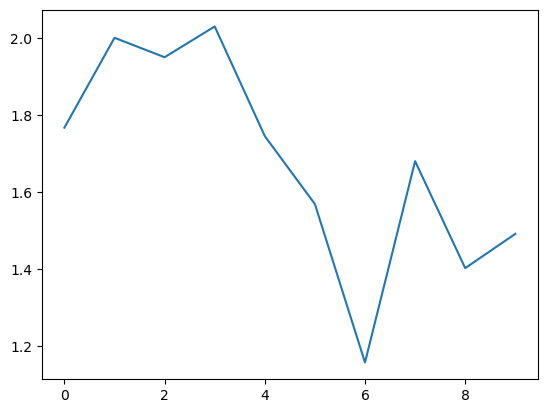

In [28]:
# upload system configuration and parameters for all the training
with open(path + "boosting_data.json") as file:
    boosting_results = json.load(file)

for key in boosting_results.keys():
    gci_step_data = boosting_results[key]
    plt.plot(gci_step_data['eo_d_params'])
    s = gci_step_data['mimizer_s']
    if eo_d.name == "B Field":
        n_local = 1
    elif eo_d.name == "H_ClassicalIsing(B,J)":
        n_local = 2
    eo_d = get_gd_evolution_oracle(n_local, gci_step_data['eo_d_params'])
    loss_test = gci.loss( s, eo_d )
    print(f"Expecting energy {gci_step_data['gci_loss']} have {gci.loss()} and\
           will get {loss_test}")

In [ ]:
config['0'].keys()

dict_keys(['gci_loss', 'vqe_energy', 'target_energy', 'diff_vqe_target', 'diff_gci_target', 'gap', 'diff_vqe_target_perc', 'diff_gci_target_perc', 'fidelity_witness_vqe', 'fidelity_witness_gci', 'fidelity_vqe', 'fidelity_gci', 'nmb_cz', 'nmb_cnot', 'nmb_cz_relative', 'nmb_cnot_relative', 'mimizer_s', 'eo_d_name', 'eo_d_params'])

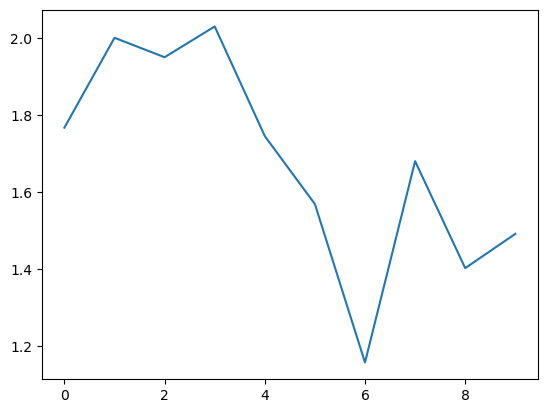

In [ ]:
gci_step_data = config['0']
plt.plot(gci_step_data['eo_d_params'])